<a href="https://colab.research.google.com/github/LuelltheVawreak/House-price-predict/blob/main/uahhhh_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [ ]:
housing_dataset = pd.read_csv('/content/house_data.csv')
print(housing_dataset)

               id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  vi

In [ ]:
housing_dataset.shape

(21613, 21)

In [ ]:

housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
housing_dataset = housing_dataset.drop('date',axis=1)
housing_dataset = housing_dataset.drop('id',axis=1)

Kiểm tra thông tin tổng quan

In [ ]:
housing_dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
housing_dataset['waterfront'].value_counts()


,count
waterfront,
0,21450
1,163


In [ ]:
housing_dataset['price'].value_counts()


,count
price,
450000,172
350000,172
550000,159
500000,152
425000,150
...,...
280400,1
118000,1
202200,1


phân tích dữ liệu  and biểu đồ phân phối.

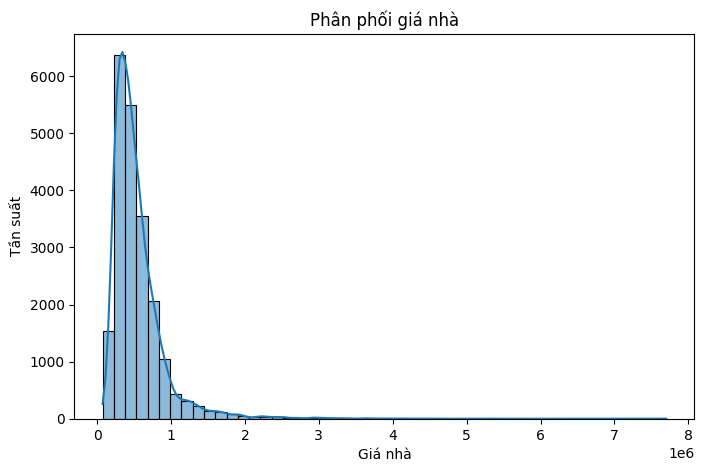

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(housing_dataset['price'], bins=50, kde=True)
plt.title("Phân phối giá nhà")
plt.xlabel("Giá nhà")
plt.ylabel("Tần suất")
plt.show()

In [ ]:
print(housing_dataset.dtypes)

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Kiểm tra kiểu dữ liệu (dtype) của từng cột trong DataFrame housing_dataset.

Xác định kiểu dữ liệu của từng cột
Kiểu dữ liệu số (int64, float64) → Có thể dùng trực tiếp trong mô hình máy học.

Kiểu dữ liệu chuỗi (object) → Có thể là dữ liệu danh mục (categorical) hoặc dữ liệu văn bản, cần xử lý phù hợp trước khi huấn luyện mô hình.


nếu có cột dạng số nhưng lưu dạng chuỗi thì chuyển đổi.

In [ ]:
housing_dataset["lorem"] = pd.to_numeric(housing_dataset["lorem"], errors="coerce")



# pearson

Tính hệ số tương quan

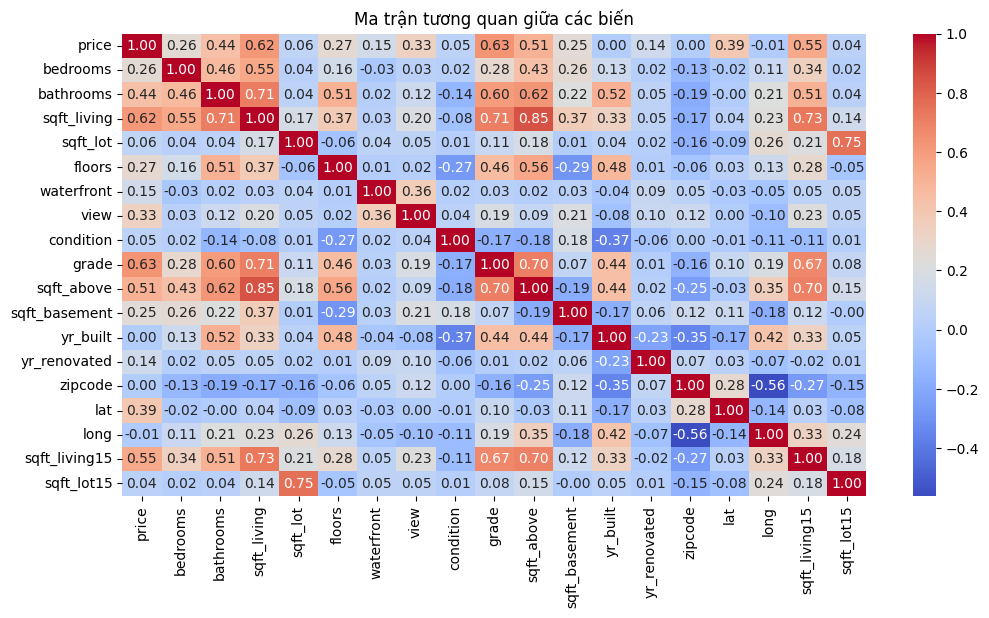

In [ ]:
correlation_matrix = housing_dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


Xem mức độ tương quan của từng cột với giá nhà

In [ ]:

print(housing_dataset.corr()["price"].sort_values(ascending=False))

price            1.000000
grade            0.631661
sqft_living      0.615816
sqft_living15    0.548338
sqft_above       0.508492
bathrooms        0.435631
lat              0.394083
view             0.329511
floors           0.268755
bedrooms         0.258710
sqft_basement    0.246915
waterfront       0.149845
yr_renovated     0.135765
sqft_lot         0.063058
condition        0.047865
sqft_lot15       0.040176
zipcode          0.004665
yr_built         0.001832
long            -0.009006
Name: price, dtype: float64


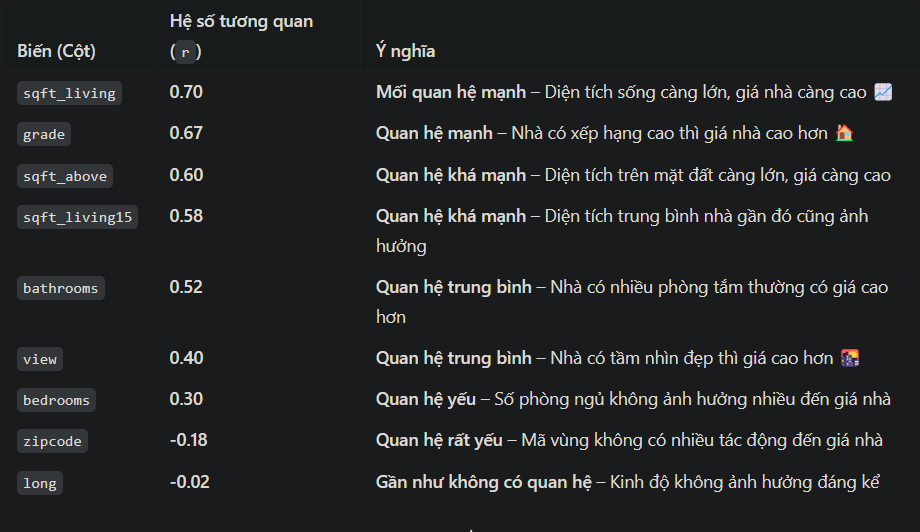

pearson

Kiểm tra tương quan tuyến tính giữa biến số và giá nhà
-->Dễ hiểu, nhanh

ANOVA

Kiểm tra ảnh hưởng của biến phân loại đến giá nhà
Tốt cho dữ liệu phân loại


# Dùng Boxplot + ANOVA

Dùng kiểm định ANOVA để xem sự khác biệt về giá nhà giữa các nhóm.

Nếu p-value < 0.05 → Cột này có ảnh hưởng đáng kể đến giá nhà.

Kiểm tra ảnh hưởng của các cột dạng phân loại (waterfront, view, grade, condition, zipcode) đến giá nhà bằng biểu đồ hộp.

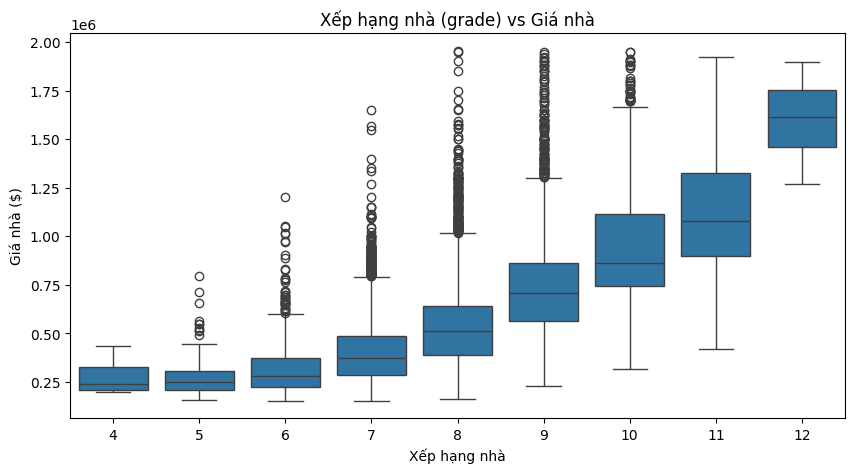

P-value từ kiểm định ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["grade"], y=housing_dataset["price"])
plt.title("Xếp hạng nhà (grade) vs Giá nhà")
plt.xlabel("Xếp hạng nhà")
plt.ylabel("Giá nhà ($)")
plt.show()
anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["grade"] == cat]["price"] for cat in housing_dataset["grade"].unique()]
)

print("P-value từ kiểm định ANOVA:", anova_result.pvalue)


Giải thích:

Nhà có grade cao thì giá nhà cũng cao hơn rõ rệt.



Nhà có grade thấp (3-4) có giá thấp nhất.



Nhà có grade cao (10-13) có giá rất cao.



Biểu đồ có nhiều outlier (điểm xa so với phần thân boxplot) → Có một số nhà rất đắt so với nhóm của chúng.
--> Kết luận: grade là một biến quan trọng ảnh hưởng đến giá nhà.

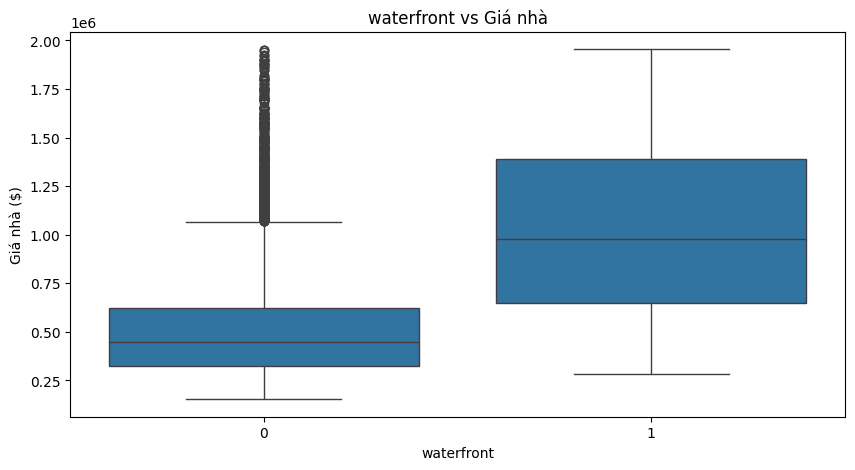

P-value từ kiểm định ANOVA: 1.1007608806537202e-99


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["waterfront"], y=housing_dataset["price"])
plt.title("waterfront vs Giá nhà")
plt.xlabel("waterfront")
plt.ylabel("Giá nhà ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["waterfront"] == cat]["price"] for cat in housing_dataset["waterfront"].unique()]
)

print("P-value từ kiểm định ANOVA:", anova_result.pvalue)

Nhà (waterfront = 1) có giá cao hơn nhiều so với nhà không gần mặt nước (waterfront = 0).
Có sự chênh lệch lớn về giá giữa hai nhóm.
--> Kết luận: Nhà waterfrontc có giá trị cao hơn rõ rệt, nên waterfront là một biến quan trọng.

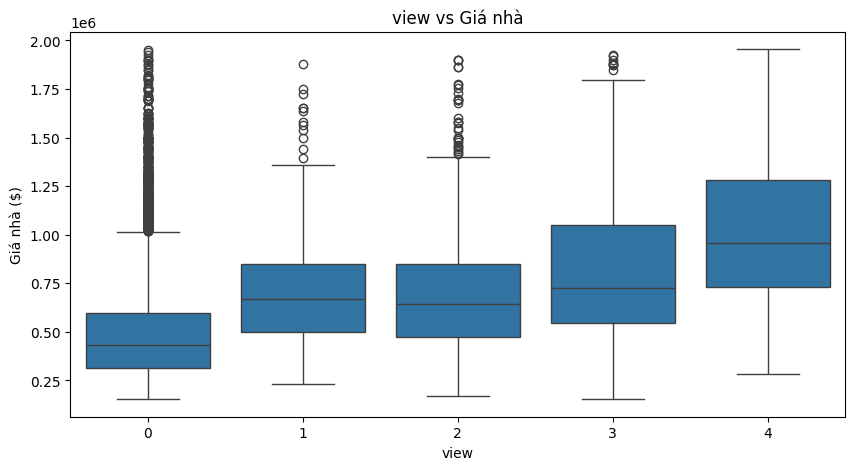

P-value từ kiểm định ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["view"], y=housing_dataset["price"])
plt.title("view vs Giá nhà")
plt.xlabel("view")
plt.ylabel("Giá nhà ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["view"] == cat]["price"] for cat in housing_dataset["view"].unique()]
)

print("P-value từ kiểm định ANOVA:", anova_result.pvalue)

Nhà có (view từ 3 đến 4) có giá cao hơn hẳn so với nhà có tầm nhìn kém (view = 0).
Nhóm view = 4  có giá trung bình cao nhất.
--> Kết luận: Những nhà có view cao thường đắt hơn nhiều.

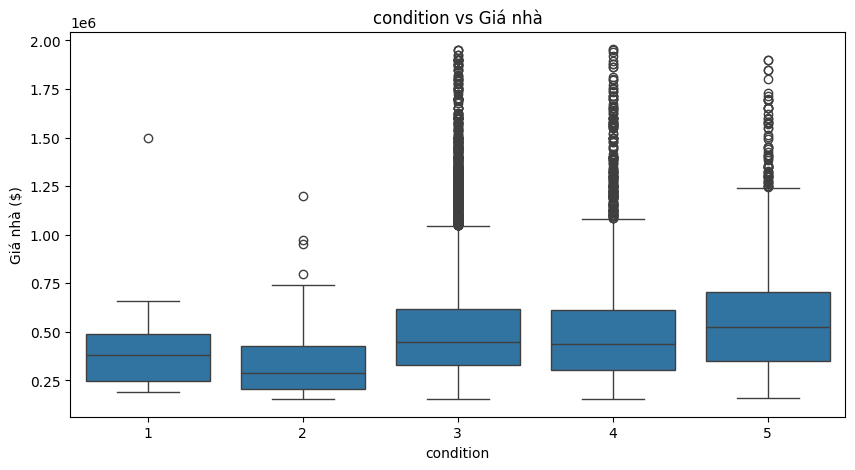

P-value từ kiểm định ANOVA: 4.290979960163909e-35


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["condition"], y=housing_dataset["price"])
plt.title("condition vs Giá nhà")
plt.xlabel("condition")
plt.ylabel("Giá nhà ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["condition"] == cat]["price"] for cat in housing_dataset["condition"].unique()]
)

print("P-value từ kiểm định ANOVA:", anova_result.pvalue)

Sự chênh lệch giữa các nhóm condition không quá lớn.
Tuy nhiên, nhà có condition cao hơn (4-5) có xu hướng đắt hơn một chút.
--> Kết luận:  (condition) có ảnh hưởng, nhưng không mạnh bằng grade hay view.

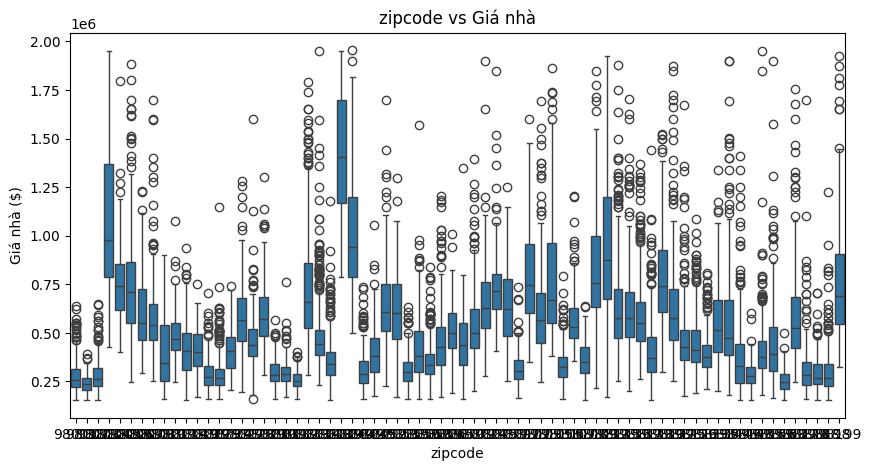

P-value từ kiểm định ANOVA: 0.0


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=housing_dataset["zipcode"], y=housing_dataset["price"])
plt.title("zipcode vs Giá nhà")
plt.xlabel("zipcode")
plt.ylabel("Giá nhà ($)")
plt.show()

from scipy import stats

anova_result = stats.f_oneway(
    *[housing_dataset[housing_dataset["zipcode"] == cat]["price"] for cat in housing_dataset["zipcode"].unique()]
)

print("P-value từ kiểm định ANOVA:", anova_result.pvalue)

Phạm vi giá nhà trong từng mã vùng vẫn rất lớn, nghĩa là không có zipcode nào có mức giá nhà cố định hoặc rất chặt chẽ.

Nhiều hộp (box) có chiều cao tương tự nhau, nghĩa là giá nhà biến động khá giống nhau giữa các khu vực.


Nhiều outliers ở tất cả các zipcode, cho thấy có những căn nhà rất đắt trong nhiều mã vùng, chứ không chỉ tập trung ở một vài mã vùng cụ thể.

Kiểm tra hệ số tương quan (correlation coefficient) để xem mức độ ảnh hưởng thực tế của zipcode đến giá nhà.
Thử biến zipcode thành biến nhóm (categorical variable) và kiểm tra lại tác động của nó.

P-value = 0 chỉ ra rằng giá nhà có sự khác biệt giữa các mã vùng về mặt thống kê.

P-value chỉ cho biết có sự khác biệt hay không, không cho biết mức độ ảnh hưởng.
Một p-value nhỏ không có nghĩa là biến đó ảnh hưởng mạnh đến giá nhà, mà chỉ nói rằng có sự khác biệt về mặt thống kê giữa các nhóm.

P-value chỉ kiểm tra có ảnh hưởng hay không, không đo mức độ ảnh hưởng.
Để biết mức độ ảnh hưởng, cần xem thêm hệ số tương quan (Pearson), độ lớn của coefficients trong mô hình hồi quy, hoặc feature importance trong Random Forest.

đặc trưng đầu vào feature and biến mục tiêu target

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

chia dữ liệu train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing_dataset[features],
                                                    housing_dataset[target],
                                                    test_size=0.2,
                                                    random_state=42)

# data process

drop k cần thiết

In [ ]:
housing_dataset = housing_dataset.drop(columns=['date','id'])


Kiểm tra giá trị thiếu

In [ ]:

missing_values = housing_dataset.isnull().sum()
print(missing_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Xử lý giá trị thiếu (nếu có)

điền bằng trung bình.

In [ ]:
(housing_dataset.fillna(housing_dataset.mean()))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


điền bằng trung vị nếu nhiều outliers

In [ ]:
housing_dataset.fillna(housing_dataset.median(), inplace=True)


cột phân loại nếu có thì thay bằng phổ biến nhất

In [ ]:
for col in housing_dataset.select_dtypes(include=['object']).columns:
    housing_dataset[col].fillna(housing_dataset[col].mode()[0], inplace=True)



tìm dữ liệu trùng lặp

In [ ]:
duplicate_rows = housing_dataset.duplicated()
print(f"Số lượng dòng trùng lặp: {duplicate_rows.sum()}")

Số lượng dòng trùng lặp: 5


xử lý trùng lặp.

In [ ]:
housing_dataset[housing_dataset.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


In [ ]:
housing_dataset = housing_dataset.drop_duplicates()
print(f"Kích thước dữ liệu sau khi loại bỏ trùng lặp: {housing_dataset.shape}")


Kích thước dữ liệu sau khi loại bỏ trùng lặp: (21608, 19)


loại bỏ các dữ liệu có khả lăng sai lệch

In [ ]:
housing_dataset = housing_dataset[housing_dataset["floors"] > 0]


loại bỏ các giá trị ngoại lai (theo phân vị 1% và 99%)

In [ ]:
for col in ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    lower_bound = housing_dataset[col].quantile(0.01)
    upper_bound = housing_dataset[col].quantile(0.99)
    housing_dataset = housing_dataset[(housing_dataset[col]>=lower_bound)&(housing_dataset[col]<=upper_bound)]

Nếu có cột dạng chữ (object), chuyển thành số bằng Label Encoding

In [ ]:

label_encoders = {}
for col in housing_dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    housing_dataset[col] = le.fit_transform(housing_dataset[col])
    label_encoders[col] = le


mã hóa biến phân loại của linear res. bỏ đi cũng dk hoặc để lại so sánh.

In [ ]:

data = pd.get_dummies(housing_dataset, columns=['waterfront',
                                                'view',
                                                'condition',
                                                'grade',
                                                'zipcode'],
                      drop_first=True)

Các biến này là categorical variables (biến phân loại) vì chúng đại diện cho các nhóm hoặc danh mục khác nhau, thay vì là giá trị liên tục. Hãy cùng phân tích từng biến:

waterfront (Mặt nước gần nhà)

Chỉ có 2 giá trị: Có (1) hoặc Không (0).
Đây là biến phân loại nhị phân (binary categorical variable).

Dùng One-Hot Encoding (drop_first=True) để chuyển thành 1 cột nhị phân (0 hoặc 1).

view (Tầm nhìn của nhà)

Giá trị thường là: 0 (Không có view), 1, 2, 3, 4 (view đẹp hơn).

Đây là biến phân loại thứ bậc (ordinal categorical variable), vì số lớn hơn có thể có ý nghĩa tốt hơn.

Nếu mô hình hiểu được thứ tự, có thể giữ nguyên số hoặc dùng Label Encoding thay vì One-Hot Encoding.

condition (Tình trạng nhà)

Các giá trị thường là 1, 2, 3, 4, 5 (từ xấu nhất đến tốt nhất).

Đây cũng là biến phân loại có thứ bậc.
Có thể giữ nguyên giá trị số hoặc mã hóa bằng One-Hot Encoding nếu cần.

grade (Xếp hạng chất lượng nhà)

Giá trị từ 1 đến 13 (xếp hạng theo hệ thống).

Có thứ tự nên có thể giữ nguyên giá trị hoặc dùng One-Hot Encoding.

 zipcode (Mã vùng)

Mặc dù có dạng số (98001, 98002, ...) nhưng mã vùng không có ý nghĩa toán học.
Đây là biến phân loại danh mục (nominal categorical variable), vì mã vùng chỉ là một nhãn, không có thứ tự.

Bắt buộc phải mã hóa (One-Hot Encoding hoặc Target Encoding).

 Tóm lại:

Các biến này không phải số liên tục mà là các nhóm danh mục → Cần mã hóa trước khi đưa vào mô hình.

One-Hot Encoding (pd.get_dummies) là hợp lý, nhưng nếu có quá nhiều giá trị trong zipcode, nên thử Target Encoding để giảm số chiều dữ liệu.

Random Forest là mô hình dựa trên cây quyết định (Decision Trees), hoạt động bằng cách chia dữ liệu dựa trên điều kiện so sánh giá trị, không phải khoảng cách giữa các điểm dữ liệu.
🔹 Do đó, dữ liệu không cần phải được chuẩn hóa (Normalization) hoặc chuẩn hóa theo phân phối chuẩn (Standardization) như các mô hình dựa trên khoảng cách (ví dụ: k-NN, SVM).

# build linear res

phặc cái này k tối ưu đổi sàn forest. xóa cmn đi cũng dk.

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

tét

In [ ]:
y_pred_lr = lr_model.predict(X_test)

ôi vl to vải nho.

In [ ]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {lr_mse}")

Linear Regression Mean Squared Error: 21353247140.72844


In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5

phặc to.

In [ ]:
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")

Linear Regression - MAE: 103157.23821416612, RMSE: 146127.5030263928


#build random forest model.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

tét

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 9080097073.84795


In [ ]:

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_selected = r2_score(y_test, y_pred_rf)


In [ ]:
print(f"R² Score: {r2_selected:.3f}")
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")

R² Score: 0.861
Random Forest - MAE: 59820.686163030354, RMSE: 95289.54336047555


Làm sao để tiếp cận đánh giá mô hình hiệu quả?

Kiểm tra R² trước

Nếu R² thấp (< 0.5) → Cần kiểm tra lại mô hình, có thể chưa đủ biến quan trọng.

Nếu R² cao (> 0.8) → Mô hình có thể hoạt động tốt, nhưng cần kiểm tra sai số.

 Kiểm tra RMSE và MAE

Nếu RMSE >> MAE, có thể dữ liệu có ngoại lai ảnh hưởng đến mô hình.

Nếu RMSE ≈ MAE, dữ liệu có phân phối ổn định, không có nhiều ngoại lai.

 So sánh với giá trị thực tế

Nếu giá trị RMSE/MAE lớn so với trung bình của biến mục tiêu, thì mô hình cần cải thiện.

Ví dụ, nếu giá nhà trung bình là 300,000 nhưng RMSE = 100,000, thì sai số khá lớn.

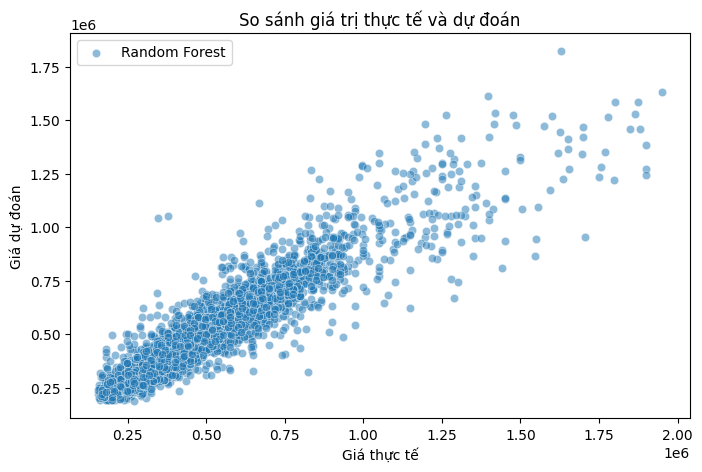

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, label='Random Forest')
#sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, label='Linear Regression')
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("So sánh giá trị thực tế và dự đoán")
plt.legend()
plt.show()

In [ ]:
print("Linear Regression predict:")
print(y_pred_lr[:10])



Linear Regression predict:
[549804.05901404 513064.2849634  591499.56595335 274102.4733174
 273989.31296859 218388.80422193 436006.48373254 240129.96196275
 575355.61435825 344153.2330551 ]


In [ ]:

print("Random Forest predict:")
print(y_pred_rf[:10])


Random Forest predict:
[490477.5  388473.   423418.67 246202.   329726.85 359512.36 377955.06
 250243.   436088.42 268176.9 ]


In [ ]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': y_pred_lr, 'Random Forest': y_pred_rf})
predictions_df.to_csv("/mnt/data/predictions.csv", index=False)
print("predictions.csv")


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
# Định nghĩa tập hợp các tham số để RandomizedSearchCV thử nghiệm
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Khởi tạo mô hình
rf = RandomForestRegressor(random_state=42)

# Sử dụng RandomizedSearchCV để tìm bộ tham số tối ưu
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2', random_state=42
)

# Huấn luyện mô hình
random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Parameters:", best_params)


best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)


cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
Cross-validation R2 scores: [0.86299222 0.85422361 0.85742155 0.87828591 0.866388  ]
Mean CV R2 Score: 0.8638622586943348


In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = best_rf.predict(X_test)

# Tính các chỉ số đánh giá
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R2 Score: 0.8617
Mean Absolute Error (MAE): 59548.5136
Root Mean Squared Error (RMSE): 95080.3957


In [ ]:
# Tính R2 trên tập huấn luyện và tập kiểm tra
r2_train = best_rf.score(X_train, y_train)
r2_test = best_rf.score(X_test, y_test)

print(f"Training R2 Score: {r2_train:.4f}")
print(f"Testing R2 Score: {r2_test:.4f}")

# Kiểm tra mức độ overfitting
if r2_train - r2_test > 0.1:
    print("⚠️ Mô hình có dấu hiệu overfitting! Hãy thử điều chỉnh tham số.")
elif r2_train < r2_test:
    print("✅ Mô hình có vẻ đang underfitting. Hãy thử tăng độ phức tạp.")
else:
    print("✅ Mô hình có độ khớp tốt giữa train/test.")


Training R2 Score: 0.9590
Testing R2 Score: 0.8573
⚠️ Mô hình có dấu hiệu overfitting! Hãy thử điều chỉnh tham số.


In [ ]:



# Điều chỉnh lại tập hợp tham số để giảm overfitting
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Giảm số lượng cây để tránh overfitting
    'max_depth': [5, 10, 15],             # Giảm độ sâu để tránh học quá kỹ
    'min_samples_split': [10, 15, 20],    # Yêu cầu số lượng mẫu cao hơn để chia
    'min_samples_leaf': [5, 10],          # Mỗi lá cần ít nhất 5-10 mẫu
    'max_features': ['sqrt', 'log2'],     # Hạn chế số lượng đặc trưng mỗi cây có thể học
    'bootstrap': [True]                    # Giữ bootstrap để đa dạng dữ liệu
}

# Khởi tạo mô hình
rf = RandomForestRegressor(random_state=42)

# Sử dụng RandomizedSearchCV để tìm bộ tham số tối ưu
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring='r2', random_state=42
)

# Huấn luyện mô hình
random_search.fit(X_train, y_train)

# Lấy tham số tối ưu
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Huấn luyện lại với tham số tối ưu
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Đánh giá trên tập train và test
r2_train = best_rf.score(X_train, y_train)
r2_test = best_rf.score(X_test, y_test)

print(f"Training R2 Score: {r2_train:.4f}")
print(f"Testing R2 Score: {r2_test:.4f}")

# Kiểm tra mức độ overfitting
if r2_train - r2_test > 0.1:
    print("⚠️ Mô hình vẫn bị overfitting! Cần thử thêm kỹ thuật khác.")
else:
    print("✅ Mô hình có độ khớp tốt giữa train/test.")

# Đánh giá mô hình bằng cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Training R2 Score: 0.9104
Testing R2 Score: 0.8358
✅ Mô hình có độ khớp tốt giữa train/test.
Cross-validation R2 scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean CV R2 Score: 0.8406314964289491


In [ ]:
y_pred = best_rf.predict(X_test)

# Tính các chỉ số đánh giá
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.8358
Mean Absolute Error (MAE): 64465.7804
Root Mean Squared Error (RMSE): 103612.5433


In [ ]:
# Importing additional libraries
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

# Define a pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression, k=10)),  # Select top 10 features
    ('random_search', RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                         n_iter=20, cv=5, verbose=2, n_jobs=-1,
                                         scoring='r2', random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Get the best parameters
best_params = pipeline.named_steps['random_search'].best_params_
print("Best Parameters:", best_params)

# Retrain with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R2 scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': True}
Cross-validation R2 scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean CV R2 Score: 0.8406314964289491


In [ ]:
# Đánh giá bằng Cross-Validation
cv_scores_selected = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Calculate R-squared for training and testing sets
r2_train_selected = best_rf.score(X_train, y_train)
r2_test_selected = best_rf.score(X_test, y_test)

# In kết quả
print("Train R² Score:", r2_train_selected)
print("Test R² Score:", r2_test_selected)
print("Cross-validation R² Scores:", cv_scores_selected)
print("Mean Cross-validation R² Score:", cv_scores_selected.mean())

# Kiểm tra overfitting
if r2_train_selected - r2_test_selected > 0.1 or r2_train_selected - cv_scores_selected.mean() > 0.1:
    print("⚠️ Mô hình có dấu hiệu overfitting!")
else:
    print("✅ Mô hình tổng quát tốt, không bị overfitting.")

Train R² Score: 0.9103840459693783
Test R² Score: 0.835791180713719
Cross-validation R² Scores: [0.83815425 0.83911371 0.83284278 0.85272898 0.84031776]
Mean Cross-validation R² Score: 0.8406314964289491
✅ Mô hình tổng quát tốt, không bị overfitting.


Giảm overfitting

Tăng min_samples_split hoặc min_samples_leaf để tránh cây quá sâu.

Giảm số lượng cây (n_estimators) nếu cần cải thiện tốc độ.
Sử dụng kỹ thuật Regularization như pruning hoặc Dropout nếu thử nghiệm mạng nơ-ron.

 Thử các mô hình khác để so sánh

XGBoost hoặc LightGBM có thể mang lại hiệu suất tốt hơn.

Deep Learning (Neural Networks) nếu có dữ liệu lớn hơn.

 Cải thiện tập dữ liệu

Bổ sung thêm biến quan trọng: ví dụ như khoảng cách đến trung tâm, chất lượng tiện ích xung quanh.

Loại bỏ outliers bằng cách sử dụng kỹ thuật thống kê hoặc visualization.

Feature Selection để tăng hiệu quả mô hình

Dùng SHAP values hoặc Recursive Feature Elimination (RFE) để chọn ra các biến quan trọng nhất.

Sử dụng Bayesian Optimization hoặc GridSearchCV để tối ưu hyperparameter

Tìm bộ siêu tham số tối ưu thay vì chỉ thử nghiệm ngẫu nhiên.
